# تم تطوير نموذج تعلم آلي للتنبؤ اليومي بإنتاج البترول باستخدام بيانات تشغيل حقيقية من شركة GSE

# I developed a Machine Learning Model for Daily Oil Production Forecasting Using Real Operational Data from GSE


# Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Dataset

In [12]:
data=pd.read_excel('GSE_MPFM_SEP_TEST_Database_GISE-Stage.xlsx',skiprows=1)
data.head()

C:\Users\DZ Laptops\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


,Block,Field,Well,Year,Date,"Duration, [hrs]","Choke Size, [1/64""]","WHP, [barg]","WHT, [degC]","MPFM P, [barg]",...,"Qg(solution), [Sm3/d]","Qg, [Sm3/d]","Qg, [Kscm/d]","WCtotal, [%]","WCres, [%]","GORfree, [Sm3/Sm3]","GORsolution, [Sm3/Sm3]","GOR, [Sm3/Sm3]","DP Venturi, [mbar]",Notes
0,NaN,XN,XN-2,1990.0,1990-02-07,NaN,16,217,0,0,...,NaN,19600.0,19.600,0.0,0.0,NaN,NaN,140,NaN,NaN
1,NaN,XN,XN-1,1990.0,1990-02-25,NaN,NaN,129,0,0,...,NaN,317863.0,317.863,0.0,0.0,NaN,NaN,499,NaN,NaN
2,NaN,XN,XN-2,1990.0,1990-09-03,NaN,NaN,198,0,0,...,NaN,62500.0,62.500,0.0,0.0,NaN,NaN,250,NaN,NaN
3,NaN,XN,XN-2,1990.0,1990-09-04,NaN,NaN,144,0,0,...,NaN,204304.0,204.304,0.0,0.0,NaN,NaN,452,NaN,NaN
4,NaN,XN,XN-1,1995.0,1995-11-01,NaN,NaN,183,0,0,...,NaN,0.0,0.000,0.0,0.0,NaN,NaN,0,NaN,NaN


### Exploring Data

In [13]:
data.describe()

,Year,Date,"Duration, [hrs]","Qo, [stb/d]2","Qo, [Sm3/d]","Qg(free), [Sm3/d]","Qg(solution), [Sm3/d]","Qg, [Sm3/d]","Qg, [Kscm/d]","WCtotal, [%]","WCres, [%]","GORfree, [Sm3/Sm3]","GORsolution, [Sm3/Sm3]"
count,7188.000000,7188,5104.000000,7183.000000,20458.000000,1830.000000,1838.000000,7.183000e+03,7177.000000,6834.000000,6765.000000,1839.000000,1829.000000
mean,2020.190874,2018-03-07 09:28:23.756260352,13.816026,1315.267159,73.501554,51451.937544,15127.884805,8.550343e+04,84.789669,12.750384,11.982402,389.940907,330.734657
min,1990.000000,1990-02-07 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.492434,0.000000,0.000000
25%,2014.000000,2014-06-05 18:00:00,3.000000,479.898000,0.000000,9607.120783,3164.062119,1.093500e+04,10.978000,0.000000,0.000000,64.723982,35.644911
50%,2020.000000,2020-12-10 12:00:00,21.000000,840.278493,0.000000,30357.690930,8631.537393,2.660302e+04,26.791000,0.107254,0.051712,123.403864,73.225272
75%,2022.000000,2022-12-19 00:00:00,24.000000,1619.400000,85.282720,68989.435459,20169.176370,7.999415e+04,79.958057,15.360000,14.510000,248.160200,104.862107
max,20025.000000,2025-04-08 00:00:00,37.000000,14452.122000,2300.231103,463340.144341,108137.738779,4.707700e+06,1058.000000,100.000000,100.748117,37363.165690,369531.351434
std,212.490150,NaN,10.255647,1338.802920,161.015263,62364.865173,17149.204175,1.574431e+05,147.669417,22.173200,21.493198,1445.827420,8651.384893


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20463 entries, 0 to 20462
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Block                   433 non-null    object        
 1   Field                   7188 non-null   object        
 2   Well                    7188 non-null   object        
 3   Year                    7188 non-null   float64       
 4   Date                    7188 non-null   datetime64[ns]
 5   Duration, [hrs]         5104 non-null   float64       
 6   Choke Size, [1/64"]     4597 non-null   object        
 7   WHP, [barg]             7136 non-null   object        
 8   WHT, [degC]             6642 non-null   object        
 9   MPFM P, [barg]          7159 non-null   object        
 10  MPFM T, [degC]          2477 non-null   object        
 11  Qo, [stb/d]2            7183 non-null   float64       
 12  Qo, [Sm3/d]             20458 non-null  float6

# Data Cleaning & Pre-processing

In [15]:
data.rename(columns={data.columns.values[5]:'Duration_hrs',data.columns.values[6]:'ChokeSize_1_64',data.columns.values[7]:"WHP_barg",data.columns.values[8]:'WHT_degC',data.columns.values[9]:'MPFM_P_barg',data.columns.values[10]:'MPFM_T_degC',data.columns.values[11]:'Qo_stb_d_2',data.columns.values[12]:'Qo_Sm3_d',data.columns.values[14]:'Qw_total_Sm3_d',data.columns.values[15]:'Salinity_g_l',data.columns.values[16]:'Qw_dilution_l_min',data.columns.values[17]:'Qg_free_Sm3_d',data.columns.values[18]:'Qg_solution_Sm3_d',data.columns.values[19]:'Qg_Sm3_d',data.columns.values[20]:'Qg_Kscm_d',data.columns.values[21]:'WCtotal_Ratio',data.columns.values[22]:'WCres_Ratio',data.columns.values[23]:'GORfree_Sm3_Sm3',data.columns.values[24]:'GORsolution_Sm3_Sm3',data.columns.values[25]:'GOR_Sm3_Sm3',data.columns.values[26]:'DP_Venturi_mbar'},inplace=True)
data.columns

Index(['Block', 'Field', 'Well', 'Year', 'Date', 'Duration_hrs',
       'ChokeSize_1_64', 'WHP_barg', 'WHT_degC', 'MPFM_P_barg', 'MPFM_T_degC',
       'Qo_stb_d_2', 'Qo_Sm3_d', 'API', 'Qw_total_Sm3_d', 'Salinity_g_l',
       'Qw_dilution_l_min', 'Qg_free_Sm3_d', 'Qg_solution_Sm3_d', 'Qg_Sm3_d',
       'Qg_Kscm_d', 'WCtotal_Ratio', 'WCres_Ratio', 'GORfree_Sm3_Sm3',
       'GORsolution_Sm3_Sm3', 'GOR_Sm3_Sm3', 'DP_Venturi_mbar', 'Notes'],
      dtype='object')

In [16]:
data.columns=data.columns.str.upper()
data.columns

Index(['BLOCK', 'FIELD', 'WELL', 'YEAR', 'DATE', 'DURATION_HRS',
       'CHOKESIZE_1_64', 'WHP_BARG', 'WHT_DEGC', 'MPFM_P_BARG', 'MPFM_T_DEGC',
       'QO_STB_D_2', 'QO_SM3_D', 'API', 'QW_TOTAL_SM3_D', 'SALINITY_G_L',
       'QW_DILUTION_L_MIN', 'QG_FREE_SM3_D', 'QG_SOLUTION_SM3_D', 'QG_SM3_D',
       'QG_KSCM_D', 'WCTOTAL_RATIO', 'WCRES_RATIO', 'GORFREE_SM3_SM3',
       'GORSOLUTION_SM3_SM3', 'GOR_SM3_SM3', 'DP_VENTURI_MBAR', 'NOTES'],
      dtype='object')

In [17]:
data.drop(data[data.index>=7188].index,inplace=True)
data

,BLOCK,FIELD,WELL,YEAR,DATE,DURATION_HRS,CHOKESIZE_1_64,WHP_BARG,WHT_DEGC,MPFM_P_BARG,...,QG_SOLUTION_SM3_D,QG_SM3_D,QG_KSCM_D,WCTOTAL_RATIO,WCRES_RATIO,GORFREE_SM3_SM3,GORSOLUTION_SM3_SM3,GOR_SM3_SM3,DP_VENTURI_MBAR,NOTES
0,NaN,XN,XN-2,1990.0,1990-02-07,NaN,16,217,0,0,...,NaN,19600.000,19.600000,0.0,0.0,NaN,NaN,140,NaN,NaN
1,NaN,XN,XN-1,1990.0,1990-02-25,NaN,NaN,129,0,0,...,NaN,317863.000,317.863000,0.0,0.0,NaN,NaN,499,NaN,NaN
2,NaN,XN,XN-2,1990.0,1990-09-03,NaN,NaN,198,0,0,...,NaN,62500.000,62.500000,0.0,0.0,NaN,NaN,250,NaN,NaN
3,NaN,XN,XN-2,1990.0,1990-09-04,NaN,NaN,144,0,0,...,NaN,204304.000,204.304000,0.0,0.0,NaN,NaN,452,NaN,NaN
4,NaN,XN,XN-1,1995.0,1995-11-01,NaN,NaN,183,0,0,...,NaN,0.000,0.000000,0.0,0.0,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,BN11,Z,Z-2,20025.0,2025-04-07,3.0,NaN,82.9,33.7,38,...,NaN,13.402,0.013402,0.0,0.0,NaN,NaN,0.066701,532,Vx Test
7184,NaN,RRBN11,RRBN11-10,2025.0,2025-04-08,24.0,25,12.5,35,8.62,...,NaN,16825.550,16.825550,0.0,0.0,NaN,NaN,122.183597,NaN,Separator Test
7185,NaN,TH,TH-5,2025.0,2025-04-08,24.0,NaN,2.5,22.9,2,...,NaN,1088.000,1.088000,0.0,0.0,NaN,NaN,42.511164,NaN,Separator Test
7186,NaN,HBN11EP,HBN11EP-4,2025.0,2025-04-08,24.0,13,43,36,34,...,NaN,54985.000,54.985000,0.0,0.0,NaN,NaN,349.802811,NaN,Separator Test


In [18]:
data.columns

Index(['BLOCK', 'FIELD', 'WELL', 'YEAR', 'DATE', 'DURATION_HRS',
       'CHOKESIZE_1_64', 'WHP_BARG', 'WHT_DEGC', 'MPFM_P_BARG', 'MPFM_T_DEGC',
       'QO_STB_D_2', 'QO_SM3_D', 'API', 'QW_TOTAL_SM3_D', 'SALINITY_G_L',
       'QW_DILUTION_L_MIN', 'QG_FREE_SM3_D', 'QG_SOLUTION_SM3_D', 'QG_SM3_D',
       'QG_KSCM_D', 'WCTOTAL_RATIO', 'WCRES_RATIO', 'GORFREE_SM3_SM3',
       'GORSOLUTION_SM3_SM3', 'GOR_SM3_SM3', 'DP_VENTURI_MBAR', 'NOTES'],
      dtype='object')

In [19]:
df = data.drop(['BLOCK', 'FIELD', 'WELL', 'DATE', 'NOTES','QO_SM3_D'], axis=1)
df

,YEAR,DURATION_HRS,CHOKESIZE_1_64,WHP_BARG,WHT_DEGC,MPFM_P_BARG,MPFM_T_DEGC,QO_STB_D_2,API,QW_TOTAL_SM3_D,...,QG_FREE_SM3_D,QG_SOLUTION_SM3_D,QG_SM3_D,QG_KSCM_D,WCTOTAL_RATIO,WCRES_RATIO,GORFREE_SM3_SM3,GORSOLUTION_SM3_SM3,GOR_SM3_SM3,DP_VENTURI_MBAR
0,1990.0,NaN,16,217,0,0,NaN,1056.5520,NaN,0,...,NaN,NaN,19600.000,19.600000,0.0,0.0,NaN,NaN,140,NaN
1,1990.0,NaN,NaN,129,0,0,NaN,4807.3116,NaN,0,...,NaN,NaN,317863.000,317.863000,0.0,0.0,NaN,NaN,499,NaN
2,1990.0,NaN,NaN,198,0,0,NaN,1886.7000,NaN,0,...,NaN,NaN,62500.000,62.500000,0.0,0.0,NaN,NaN,250,NaN
3,1990.0,NaN,NaN,144,0,0,NaN,3411.1536,NaN,0,...,NaN,NaN,204304.000,204.304000,0.0,0.0,NaN,NaN,452,NaN
4,1995.0,NaN,NaN,183,0,0,NaN,2603.6460,NaN,0,...,NaN,NaN,0.000,0.000000,0.0,0.0,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,20025.0,3.0,NaN,82.9,33.7,38,40,1262.4000,35,0,...,NaN,NaN,13.402,0.013402,0.0,0.0,NaN,NaN,0.066701,532
7184,2025.0,24.0,25,12.5,35,8.62,NaN,865.2000,43.41,NaN,...,NaN,NaN,16825.550,16.825550,0.0,0.0,NaN,NaN,122.183597,NaN
7185,2025.0,24.0,NaN,2.5,22.9,2,NaN,160.8000,36.95,NaN,...,NaN,NaN,1088.000,1.088000,0.0,0.0,NaN,NaN,42.511164,NaN
7186,2025.0,24.0,13,43,36,34,NaN,987.6000,36.95,NaN,...,NaN,NaN,54985.000,54.985000,0.0,0.0,NaN,NaN,349.802811,NaN


### YEAR columns

In [20]:
data['YEAR']=pd.to_datetime(data['YEAR']).dt.year
data.YEAR

0       1970
1       1970
2       1970
3       1970
4       1970
        ... 
7183    1970
7184    1970
7185    1970
7186    1970
7187    1970
Name: YEAR, Length: 7188, dtype: int32

In [21]:
data.YEAR.replace(20025,2025,inplace=True)

In [22]:
df['YEAR'].isna().sum()

0

### DURATION_HRS columns

In [23]:
df.DURATION_HRS.isna().value_counts(normalize=True)*100

DURATION_HRS
False    71.007234
True     28.992766
Name: proportion, dtype: float64

In [24]:
df.dropna(subset=['DURATION_HRS'], inplace=True)

In [25]:
df.DURATION_HRS.isna().value_counts()

DURATION_HRS
False    5104
Name: count, dtype: int64

In [26]:
df.head()

,YEAR,DURATION_HRS,CHOKESIZE_1_64,WHP_BARG,WHT_DEGC,MPFM_P_BARG,MPFM_T_DEGC,QO_STB_D_2,API,QW_TOTAL_SM3_D,...,QG_FREE_SM3_D,QG_SOLUTION_SM3_D,QG_SM3_D,QG_KSCM_D,WCTOTAL_RATIO,WCRES_RATIO,GORFREE_SM3_SM3,GORSOLUTION_SM3_SM3,GOR_SM3_SM3,DP_VENTURI_MBAR
2075,2015.0,4.0,NaN,45.974044,NaN,16.524731,61.210372,736.352821,38,211.362747,...,14346.420991,4816.292316,19162.713300,19.162713,68.416735,65.347854,147.798592,49.380154,197.178745,812.786346
2076,2015.0,3.0,40,71,NaN,60.034677,77.200897,282.825304,38,480.26631,...,522.719169,2679.727904,3202.447068,3.202447,92.761616,92.761616,13.906708,71.516765,85.423473,624.79863
2077,2015.0,4.0,NaN,39.277535,82.666667,37.28367,75.861013,613.253059,38.4,259.704555,...,4966.223468,3526.219211,8492.442680,8.492443,76.167608,76.167608,61.020722,43.408673,104.429394,396.765213
2078,2015.0,3.0,NaN,64.644596,NaN,61.432956,52.452349,381.277721,48.3,0,...,155093.121894,16009.547540,171102.669460,171.102669,0.000000,0.000000,3073.919570,316.916953,3390.836524,1200.945177
2079,2015.0,3.0,NaN,31.834517,61,12.388199,57.754055,1630.818441,38,48.07021,...,70371.757690,7569.604163,77941.361866,77.941362,18.197092,18.197092,327.047390,35.044275,362.091664,4971.802883


### CHOKESIZE_1_64 columns

In [27]:
invalid_values = df[~df['CHOKESIZE_1_64'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]['CHOKESIZE_1_64'].unique()
print(invalid_values)

[nan '63 (25mm)' '40 (16mm)' ' 35 mm' '-' '/' ' -' 'MIN' ' ' 'max' '15mm'
 '35&18' '13/64' '22/64' 'min']


In [28]:
df.CHOKESIZE_1_64.replace({'63 (25mm)':63,'40 (16mm)':40,' 35 mm':np.nan,'-':np.nan,'/':np.nan,' -':np.nan,'MIN':1,' ':np.nan,'max':64,'15mm':np.nan,'35&18':35,'13/64':13,'22/64':22,'min':1},inplace=True)

C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\2334854247.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.CHOKESIZE_1_64.replace({'63 (25mm)':63,'40 (16mm)':40,' 35 mm':np.nan,'-':np.nan,'/':np.nan,' -':np.nan,'MIN':1,' ':np.nan,'max':64,'15mm':np.nan,'35&18':35,'13/64':13,'22/64':22,'min':1},inplace=True)
C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\2334854247.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explici

In [29]:
df.CHOKESIZE_1_64.isna().value_counts(normalize=True)*100

CHOKESIZE_1_64
True     62.460815
False    37.539185
Name: proportion, dtype: float64

In [30]:
# df.dropna(subset='CHOKESIZE_1_64',inplace=True)

In [31]:
df=df.drop(columns='CHOKESIZE_1_64')

In [32]:
df.head()

,YEAR,DURATION_HRS,WHP_BARG,WHT_DEGC,MPFM_P_BARG,MPFM_T_DEGC,QO_STB_D_2,API,QW_TOTAL_SM3_D,SALINITY_G_L,...,QG_FREE_SM3_D,QG_SOLUTION_SM3_D,QG_SM3_D,QG_KSCM_D,WCTOTAL_RATIO,WCRES_RATIO,GORFREE_SM3_SM3,GORSOLUTION_SM3_SM3,GOR_SM3_SM3,DP_VENTURI_MBAR
2075,2015.0,4.0,45.974044,NaN,16.524731,61.210372,736.352821,38,211.362747,> 300,...,14346.420991,4816.292316,19162.713300,19.162713,68.416735,65.347854,147.798592,49.380154,197.178745,812.786346
2076,2015.0,3.0,71,NaN,60.034677,77.200897,282.825304,38,480.26631,210,...,522.719169,2679.727904,3202.447068,3.202447,92.761616,92.761616,13.906708,71.516765,85.423473,624.79863
2077,2015.0,4.0,39.277535,82.666667,37.28367,75.861013,613.253059,38.4,259.704555,330,...,4966.223468,3526.219211,8492.442680,8.492443,76.167608,76.167608,61.020722,43.408673,104.429394,396.765213
2078,2015.0,3.0,64.644596,NaN,61.432956,52.452349,381.277721,48.3,0,NaN,...,155093.121894,16009.547540,171102.669460,171.102669,0.000000,0.000000,3073.919570,316.916953,3390.836524,1200.945177
2079,2015.0,3.0,31.834517,61,12.388199,57.754055,1630.818441,38,48.07021,NaN,...,70371.757690,7569.604163,77941.361866,77.941362,18.197092,18.197092,327.047390,35.044275,362.091664,4971.802883


### WHP_BARG columns

In [33]:
df['WHP_BARG'].isna().sum()

44

In [34]:
# استخرج القيم غير القابلة للتحويل إلى float
invalid_values = df[~df['WHP_BARG'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]['WHP_BARG'].unique()
print(invalid_values)


[nan '26-37' '26-36' '16-26' '19-27' '20-28' '19-28' '20-27' '30-27'
 '30-33']


In [35]:
df.replace({'26-37':26.37,'26-36':26.36,'16-26':16.26,'19-27':19.27,'20-28':20.28,'19-28':19.28,'20-27':20.27,'30-27':30.27,'30-33':30.33},inplace=True)

C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\2454705493.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'26-37':26.37,'26-36':26.36,'16-26':16.26,'19-27':19.27,'20-28':20.28,'19-28':19.28,'20-27':20.27,'30-27':30.27,'30-33':30.33},inplace=True)


In [36]:
df['WHP_BARG'].dtype

dtype('float64')

In [37]:
df['WHP_BARG'].fillna(method='ffill',inplace=True)

C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\3417155310.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WHP_BARG'].fillna(method='ffill',inplace=True)
C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\3417155310.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['WHP_BARG'].fillna(method='ffill',inplace=True)


In [38]:
df

,YEAR,DURATION_HRS,WHP_BARG,WHT_DEGC,MPFM_P_BARG,MPFM_T_DEGC,QO_STB_D_2,API,QW_TOTAL_SM3_D,SALINITY_G_L,...,QG_FREE_SM3_D,QG_SOLUTION_SM3_D,QG_SM3_D,QG_KSCM_D,WCTOTAL_RATIO,WCRES_RATIO,GORFREE_SM3_SM3,GORSOLUTION_SM3_SM3,GOR_SM3_SM3,DP_VENTURI_MBAR
2075,2015.0,4.0,45.974044,NaN,16.524731,61.210372,736.352821,38,211.362747,> 300,...,14346.420991,4816.292316,19162.713300,19.162713,68.416735,65.347854,147.798592,49.380154,197.178745,812.786346
2076,2015.0,3.0,71.000000,NaN,60.034677,77.200897,282.825304,38,480.26631,210,...,522.719169,2679.727904,3202.447068,3.202447,92.761616,92.761616,13.906708,71.516765,85.423473,624.798630
2077,2015.0,4.0,39.277535,82.666667,37.28367,75.861013,613.253059,38.4,259.704555,330,...,4966.223468,3526.219211,8492.442680,8.492443,76.167608,76.167608,61.020722,43.408673,104.429394,396.765213
2078,2015.0,3.0,64.644596,NaN,61.432956,52.452349,381.277721,48.3,0,NaN,...,155093.121894,16009.547540,171102.669460,171.102669,0.000000,0.000000,3073.919570,316.916953,3390.836524,1200.945177
2079,2015.0,3.0,31.834517,61,12.388199,57.754055,1630.818441,38,48.07021,NaN,...,70371.757690,7569.604163,77941.361866,77.941362,18.197092,18.197092,327.047390,35.044275,362.091664,4971.802883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,20025.0,3.0,82.900000,33.7,38,40,1262.400000,35,0,NaN,...,NaN,NaN,13.402000,0.013402,0.000000,0.000000,NaN,NaN,0.066701,532.000000
7184,2025.0,24.0,12.500000,35,8.62,NaN,865.200000,43.41,NaN,NaN,...,NaN,NaN,16825.550000,16.825550,0.000000,0.000000,NaN,NaN,122.183597,NaN
7185,2025.0,24.0,2.500000,22.9,2,NaN,160.800000,36.95,NaN,NaN,...,NaN,NaN,1088.000000,1.088000,0.000000,0.000000,NaN,NaN,42.511164,NaN
7186,2025.0,24.0,43.000000,36,34,NaN,987.600000,36.95,NaN,NaN,...,NaN,NaN,54985.000000,54.985000,0.000000,0.000000,NaN,NaN,349.802811,NaN


### WHT_DEGC columns

In [39]:
df.WHT_DEGC.isna().value_counts(normalize=True)*100

WHT_DEGC
False    89.79232
True     10.20768
Name: proportion, dtype: float64

In [40]:
invalid_values = df[~df['WHT_DEGC'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]['WHT_DEGC'].unique()
print(invalid_values)

[nan 'NA ' 'H/S' '-' '/']


In [41]:
df.drop(df[(df['WHT_DEGC'] == '-') | (df['WHT_DEGC'] == 'H/S') | (df['WHT_DEGC'] == '/')].index, inplace=True)
df.replace({'NA ':np.nan,'N/A':np.nan},inplace=True)

C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\3805355883.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'NA ':np.nan,'N/A':np.nan},inplace=True)


In [42]:
df.WHT_DEGC.isna().value_counts(normalize=True)*100

WHT_DEGC
False    89.746612
True     10.253388
Name: proportion, dtype: float64

In [43]:
df.dropna(subset='WHT_DEGC',inplace=True)

In [44]:
df.WHT_DEGC.shape

(4569,)

In [45]:
# df = df[(df['WHT_DEGC'] > 10) & (df['WHT_DEGC'] < 180)]

In [46]:
df

,YEAR,DURATION_HRS,WHP_BARG,WHT_DEGC,MPFM_P_BARG,MPFM_T_DEGC,QO_STB_D_2,API,QW_TOTAL_SM3_D,SALINITY_G_L,...,QG_FREE_SM3_D,QG_SOLUTION_SM3_D,QG_SM3_D,QG_KSCM_D,WCTOTAL_RATIO,WCRES_RATIO,GORFREE_SM3_SM3,GORSOLUTION_SM3_SM3,GOR_SM3_SM3,DP_VENTURI_MBAR
2077,2015.0,4.0,39.277535,82.666667,37.28367,75.861013,613.253059,38.4,259.704555,330,...,4966.223468,3526.219211,8492.442680,8.492443,76.167608,76.167608,61.020722,43.408673,104.429394,396.765213
2079,2015.0,3.0,31.834517,61.000000,12.388199,57.754055,1630.818441,38,48.07021,NaN,...,70371.757690,7569.604163,77941.361866,77.941362,18.197092,18.197092,327.047390,35.044275,362.091664,4971.802883
2081,2015.0,3.0,8.000000,44.000000,7.620183,44.788856,1.241366,36,90.864206,215,...,182.081421,4.244555,186.325975,0.186326,99.819300,99.819300,1241.406149,25.817468,1267.223618,41.302907
2083,2015.0,3.0,58.819985,56.000000,40.896079,44.87719,710.326994,46,1.908789,NaN,...,178955.969126,9082.141502,188038.110536,188.038111,1.987665,1.987665,1913.095229,96.506006,2009.601234,3620.411602
2084,2015.0,3.0,22.691197,39.000000,17.148498,39.165483,370.181362,46,22.882623,NaN,...,2656.308153,3104.081824,5760.389978,5.760390,31.810556,31.810556,53.959932,63.294541,117.254473,40.875643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,20025.0,3.0,82.900000,33.700000,38,40,1262.400000,35,0,NaN,...,NaN,NaN,13.402000,0.013402,0.000000,0.000000,NaN,NaN,0.066701,532.000000
7184,2025.0,24.0,12.500000,35.000000,8.62,NaN,865.200000,43.41,NaN,NaN,...,NaN,NaN,16825.550000,16.825550,0.000000,0.000000,NaN,NaN,122.183597,NaN
7185,2025.0,24.0,2.500000,22.900000,2,NaN,160.800000,36.95,NaN,NaN,...,NaN,NaN,1088.000000,1.088000,0.000000,0.000000,NaN,NaN,42.511164,NaN
7186,2025.0,24.0,43.000000,36.000000,34,NaN,987.600000,36.95,NaN,NaN,...,NaN,NaN,54985.000000,54.985000,0.000000,0.000000,NaN,NaN,349.802811,NaN


In [47]:
df.reset_index(drop=True,inplace=True)

### MPFM_P_BARG columns

In [48]:
df.MPFM_P_BARG.isna().sum()

14

In [49]:
df.MPFM_P_BARG.fillna(method='bfill',inplace=True)

C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\3917878089.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.MPFM_P_BARG.fillna(method='bfill',inplace=True)
C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\3917878089.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.MPFM_P_BARG.fillna(method='bfill',inplace=True)


In [50]:
df.MPFM_P_BARG.fillna(method='bfill',inplace=True)

C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\3917878089.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.MPFM_P_BARG.fillna(method='bfill',inplace=True)


### MPFM_T_DEGC columns

In [51]:
df.MPFM_T_DEGC.isna().value_counts(normalize=True)*100

MPFM_T_DEGC
True     56.073539
False    43.926461
Name: proportion, dtype: float64

In [52]:
invalid_values = df[~df['MPFM_T_DEGC'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]['MPFM_T_DEGC'].unique()
print(invalid_values)

[-2.2 -0.9 '-' nan '/' -10.517862025316454 -10.308754545454548
 -0.9408765599999999]


In [53]:
df.MPFM_T_DEGC.replace({'-':np.nan,'/':np.nan},inplace=True)

C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\4253382527.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.MPFM_T_DEGC.replace({'-':np.nan,'/':np.nan},inplace=True)
C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\4253382527.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.MP

In [54]:
df=df.drop(columns='MPFM_T_DEGC')

### API columns

In [55]:
df.API.isna().value_counts()

API
False    4491
True       78
Name: count, dtype: int64

In [56]:
df.API.replace({'430':43,'273':27.3,'148':48},inplace=True)

C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\268296572.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.API.replace({'430':43,'273':27.3,'148':48},inplace=True)


In [57]:
invalid_values = df[~df['API'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]['API'].unique()
print(invalid_values)

[nan '/']


In [58]:
df.replace({'-':np.nan,'/':np.nan},inplace=True)

C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\3075880167.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'-':np.nan,'/':np.nan},inplace=True)


In [59]:
df.API.fillna(method='ffill',inplace=True)

C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\3711251213.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.API.fillna(method='ffill',inplace=True)
C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\3711251213.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.API.fillna(method='ffill',inplace=True)


In [60]:
df.API.isna().sum()

0

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4569 entries, 0 to 4568
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 4569 non-null   float64
 1   DURATION_HRS         4569 non-null   float64
 2   WHP_BARG             4569 non-null   float64
 3   WHT_DEGC             4569 non-null   float64
 4   MPFM_P_BARG          4566 non-null   float64
 5   QO_STB_D_2           4564 non-null   float64
 6   API                  4569 non-null   float64
 7   QW_TOTAL_SM3_D       4264 non-null   object 
 8   SALINITY_G_L         1909 non-null   object 
 9   QW_DILUTION_L_MIN    4071 non-null   float64
 10  QG_FREE_SM3_D        1381 non-null   float64
 11  QG_SOLUTION_SM3_D    1389 non-null   float64
 12  QG_SM3_D             4566 non-null   float64
 13  QG_KSCM_D            4559 non-null   float64
 14  WCTOTAL_RATIO        4221 non-null   float64
 15  WCRES_RATIO          4161 non-null   f

### QW_TOTAL_SM3_D columns

In [62]:
invalid_values = df[~df['QW_TOTAL_SM3_D'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]['QW_TOTAL_SM3_D'].unique()
print(invalid_values)

[nan 'TRACE' '           ']


In [63]:
df.QW_TOTAL_SM3_D.replace({'TRACE':np.nan,'           ':np.nan},inplace=True)

C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\527298285.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.QW_TOTAL_SM3_D.replace({'TRACE':np.nan,'           ':np.nan},inplace=True)
C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\527298285.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting',

In [64]:
df.QW_TOTAL_SM3_D.isna().value_counts(normalize=True)*100

QW_TOTAL_SM3_D
False    93.280805
True      6.719195
Name: proportion, dtype: float64

In [65]:
df.QW_TOTAL_SM3_D.ffill(inplace=True)

In [66]:
df.QW_TOTAL_SM3_D.isna().sum()

0

#### SALINITY_G_L & QG_FREE_SM3_D & QG_SOLUTION_SM3_D & GORFREE_SM3_SM3 & GORSOLUTION_SM3_SM3 & DP_VENTURI_MBAR columns

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4569 entries, 0 to 4568
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 4569 non-null   float64
 1   DURATION_HRS         4569 non-null   float64
 2   WHP_BARG             4569 non-null   float64
 3   WHT_DEGC             4569 non-null   float64
 4   MPFM_P_BARG          4566 non-null   float64
 5   QO_STB_D_2           4564 non-null   float64
 6   API                  4569 non-null   float64
 7   QW_TOTAL_SM3_D       4569 non-null   float64
 8   SALINITY_G_L         1909 non-null   object 
 9   QW_DILUTION_L_MIN    4071 non-null   float64
 10  QG_FREE_SM3_D        1381 non-null   float64
 11  QG_SOLUTION_SM3_D    1389 non-null   float64
 12  QG_SM3_D             4566 non-null   float64
 13  QG_KSCM_D            4559 non-null   float64
 14  WCTOTAL_RATIO        4221 non-null   float64
 15  WCRES_RATIO          4161 non-null   f

In [68]:
df.drop(columns=['SALINITY_G_L','QG_FREE_SM3_D','QG_SOLUTION_SM3_D','GORFREE_SM3_SM3','GORSOLUTION_SM3_SM3','DP_VENTURI_MBAR'],inplace=True)

### QW_DILUTION_L_MIN columns

In [69]:
df.QW_DILUTION_L_MIN.isna().value_counts(normalize=True)*100

QW_DILUTION_L_MIN
False    89.10046
True     10.89954
Name: proportion, dtype: float64

In [70]:
df.dropna(subset='QW_DILUTION_L_MIN',inplace=True)

### QG_KSCM_D columns

In [71]:
df.QG_KSCM_D.ffill(inplace=True)

C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\267448523.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.QG_KSCM_D.ffill(inplace=True)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4071 entries, 0 to 4568
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               4071 non-null   float64
 1   DURATION_HRS       4071 non-null   float64
 2   WHP_BARG           4071 non-null   float64
 3   WHT_DEGC           4071 non-null   float64
 4   MPFM_P_BARG        4068 non-null   float64
 5   QO_STB_D_2         4067 non-null   float64
 6   API                4071 non-null   float64
 7   QW_TOTAL_SM3_D     4071 non-null   float64
 8   QW_DILUTION_L_MIN  4071 non-null   float64
 9   QG_SM3_D           4071 non-null   float64
 10  QG_KSCM_D          4071 non-null   float64
 11  WCTOTAL_RATIO      3797 non-null   float64
 12  WCRES_RATIO        3776 non-null   float64
 13  GOR_SM3_SM3        3980 non-null   float64
dtypes: float64(14)
memory usage: 477.1 KB


### WCTOTAL_RATIO columns

In [73]:
df.WCTOTAL_RATIO.isna().value_counts(normalize=True)*100

WCTOTAL_RATIO
False    93.269467
True      6.730533
Name: proportion, dtype: float64

In [74]:
df.dropna(subset='WCTOTAL_RATIO',inplace=True)

### WCRES_RATIO columns

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3797 entries, 0 to 4568
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               3797 non-null   float64
 1   DURATION_HRS       3797 non-null   float64
 2   WHP_BARG           3797 non-null   float64
 3   WHT_DEGC           3797 non-null   float64
 4   MPFM_P_BARG        3794 non-null   float64
 5   QO_STB_D_2         3793 non-null   float64
 6   API                3797 non-null   float64
 7   QW_TOTAL_SM3_D     3797 non-null   float64
 8   QW_DILUTION_L_MIN  3797 non-null   float64
 9   QG_SM3_D           3797 non-null   float64
 10  QG_KSCM_D          3797 non-null   float64
 11  WCTOTAL_RATIO      3797 non-null   float64
 12  WCRES_RATIO        3772 non-null   float64
 13  GOR_SM3_SM3        3749 non-null   float64
dtypes: float64(14)
memory usage: 445.0 KB


In [76]:
df.WCRES_RATIO.ffill(inplace=True)

C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\93280700.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.WCRES_RATIO.ffill(inplace=True)


### GOR_SM3_SM3 columns

In [77]:
df.GOR_SM3_SM3.bfill(inplace=True)

C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\260152132.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.GOR_SM3_SM3.bfill(inplace=True)


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3797 entries, 0 to 4568
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               3797 non-null   float64
 1   DURATION_HRS       3797 non-null   float64
 2   WHP_BARG           3797 non-null   float64
 3   WHT_DEGC           3797 non-null   float64
 4   MPFM_P_BARG        3794 non-null   float64
 5   QO_STB_D_2         3793 non-null   float64
 6   API                3797 non-null   float64
 7   QW_TOTAL_SM3_D     3797 non-null   float64
 8   QW_DILUTION_L_MIN  3797 non-null   float64
 9   QG_SM3_D           3797 non-null   float64
 10  QG_KSCM_D          3797 non-null   float64
 11  WCTOTAL_RATIO      3797 non-null   float64
 12  WCRES_RATIO        3797 non-null   float64
 13  GOR_SM3_SM3        3797 non-null   float64
dtypes: float64(14)
memory usage: 445.0 KB


In [79]:
df.MPFM_P_BARG.ffill(inplace=True)

C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\2800200694.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.MPFM_P_BARG.ffill(inplace=True)


In [80]:
df.columns

Index(['YEAR', 'DURATION_HRS', 'WHP_BARG', 'WHT_DEGC', 'MPFM_P_BARG',
       'QO_STB_D_2', 'API', 'QW_TOTAL_SM3_D', 'QW_DILUTION_L_MIN', 'QG_SM3_D',
       'QG_KSCM_D', 'WCTOTAL_RATIO', 'WCRES_RATIO', 'GOR_SM3_SM3'],
      dtype='object')

### QO_STB_D_2 columns target

In [81]:
df.drop(df[df['QO_STB_D_2'] == '#VALUE!'].index, inplace=True)

In [82]:
df.QO_STB_D_2.isna().value_counts()

QO_STB_D_2
False    3793
True        4
Name: count, dtype: int64

In [83]:
df.QO_STB_D_2=df.QO_STB_D_2.astype(dtype=float)

In [84]:
df.QO_STB_D_2.fillna(method='ffill',inplace=True)

C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\4157518797.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.QO_STB_D_2.fillna(method='ffill',inplace=True)
C:\Users\DZ Laptops\AppData\Local\Temp\ipykernel_5372\4157518797.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.QO_STB_D_2.fillna(method='ffill',inplace=True)


In [85]:
df.QO_STB_D_2.sort_values()

3246       0.000000
3290       0.000000
2570       0.000000
2568       0.000000
4120       0.000000
           ...     
765     8160.548285
486     8242.215191
728     8767.944238
1793    9828.432000
1797    9970.452000
Name: QO_STB_D_2, Length: 3797, dtype: float64

In [86]:
df.reset_index(drop=True,inplace=True)

In [87]:
df

,YEAR,DURATION_HRS,WHP_BARG,WHT_DEGC,MPFM_P_BARG,QO_STB_D_2,API,QW_TOTAL_SM3_D,QW_DILUTION_L_MIN,QG_SM3_D,QG_KSCM_D,WCTOTAL_RATIO,WCRES_RATIO,GOR_SM3_SM3
0,2015.0,4.0,39.277535,82.666667,37.283670,613.253059,38.4,259.704555,0.0,8492.442680,8.492443,76.167608,76.167608,104.429394
1,2015.0,3.0,31.834517,61.000000,12.388199,1630.818441,38.0,48.070210,0.0,77941.361866,77.941362,18.197092,18.197092,362.091664
2,2015.0,3.0,8.000000,44.000000,7.620183,1.241366,36.0,90.864206,0.0,186.325975,0.186326,99.819300,99.819300,1267.223618
3,2015.0,3.0,58.819985,56.000000,40.896079,710.326994,46.0,1.908789,0.0,188038.110536,188.038111,1.987665,1.987665,2009.601234
4,2015.0,3.0,22.691197,39.000000,17.148498,370.181362,46.0,22.882623,0.0,5760.389978,5.760390,31.810556,31.810556,117.254473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,2025.0,3.0,97.700000,50.000000,48.900000,138.120000,57.0,0.290000,0.0,112889.000000,112.889000,1.500000,1.500000,6525.000000
3793,2025.0,3.0,12.600000,26.000000,3.400000,520.620000,49.0,84.290000,0.0,11037.000000,13.000000,55.000000,55.000000,589.000000
3794,2025.0,3.0,39.000000,31.000000,15.000000,1070.748000,39.0,146.000000,30.0,22594.000000,22.594000,51.000000,42.000000,159.000000
3795,20025.0,3.0,82.900000,33.700000,38.000000,1262.400000,35.0,0.000000,0.0,13.402000,0.013402,0.000000,0.000000,0.066701


The most important columns associated with production:
QO_STB_D_2           1.000000
MPFM_P_BARG          0.468873
QW_TOTAL_SM3_D       0.159419
WHT_DEGC             0.133738
QG_KSCM_D            0.051997
QG_SM3_D             0.041717
WHP_BARG             0.039455
QW_DILUTION_L_MIN    0.008555
YEAR                -0.000342
WCTOTAL_RATIO       -0.047612
GOR_SM3_SM3         -0.054250
WCRES_RATIO         -0.056941
API                 -0.205449
DURATION_HRS        -0.398453
Name: QO_STB_D_2, dtype: float64


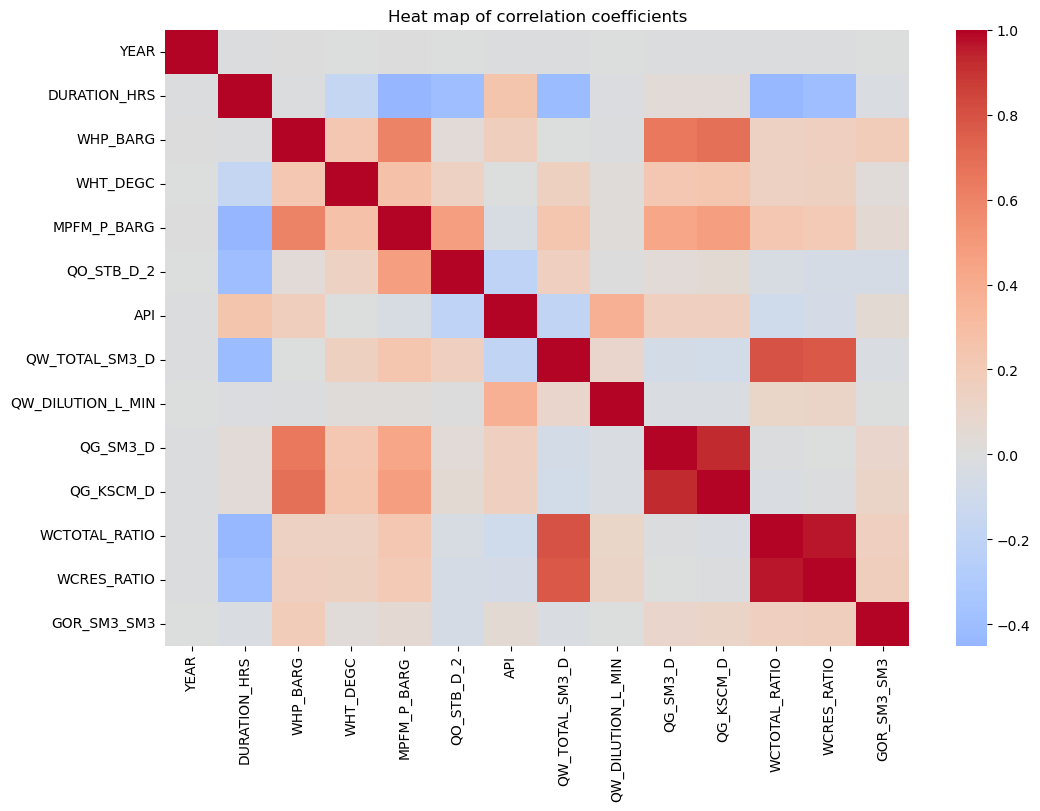

In [88]:
df_numeric = df.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()
target_corr = correlation_matrix['QO_STB_D_2'].sort_values(ascending=False)
print("The most important columns associated with production:")
print(target_corr)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Heat map of correlation coefficients")
plt.show()

In [89]:
important_features=['MPFM_P_BARG','QW_TOTAL_SM3_D','WHT_DEGC','QG_KSCM_D','QG_SM3_D','WHP_BARG','QW_DILUTION_L_MIN']  
df = df[important_features + ['QO_STB_D_2']]

In [90]:
df

,MPFM_P_BARG,QW_TOTAL_SM3_D,WHT_DEGC,QG_KSCM_D,QG_SM3_D,WHP_BARG,QW_DILUTION_L_MIN,QO_STB_D_2
0,37.283670,259.704555,82.666667,8.492443,8492.442680,39.277535,0.0,613.253059
1,12.388199,48.070210,61.000000,77.941362,77941.361866,31.834517,0.0,1630.818441
2,7.620183,90.864206,44.000000,0.186326,186.325975,8.000000,0.0,1.241366
3,40.896079,1.908789,56.000000,188.038111,188038.110536,58.819985,0.0,710.326994
4,17.148498,22.882623,39.000000,5.760390,5760.389978,22.691197,0.0,370.181362
...,...,...,...,...,...,...,...,...
3792,48.900000,0.290000,50.000000,112.889000,112889.000000,97.700000,0.0,138.120000
3793,3.400000,84.290000,26.000000,13.000000,11037.000000,12.600000,0.0,520.620000
3794,15.000000,146.000000,31.000000,22.594000,22594.000000,39.000000,30.0,1070.748000
3795,38.000000,0.000000,33.700000,0.013402,13.402000,82.900000,0.0,1262.400000


In [91]:
# df.to_excel('FINAL_DATA_GSE.xlsx', sheet_name='clean_data_gse', index=False)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3797 entries, 0 to 3796
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MPFM_P_BARG        3797 non-null   float64
 1   QW_TOTAL_SM3_D     3797 non-null   float64
 2   WHT_DEGC           3797 non-null   float64
 3   QG_KSCM_D          3797 non-null   float64
 4   QG_SM3_D           3797 non-null   float64
 5   WHP_BARG           3797 non-null   float64
 6   QW_DILUTION_L_MIN  3797 non-null   float64
 7   QO_STB_D_2         3797 non-null   float64
dtypes: float64(8)
memory usage: 237.4 KB


# Regression

### Model Selection & Evaluation

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
from catboost import CatBoostRegressor

In [96]:
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# First Algorithm: Linear Regression


In [99]:
X = df[important_features]
y = df['QO_STB_D_2']


In [100]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

In [101]:
model1=LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
y_pred=model1.fit(X_train,y_train).predict(X_test)

In [102]:
r2_score(y_test, y_pred)

0.4015053469188985

In [103]:
mean_absolute_error(y_test, y_pred)

633.40956310357

In [104]:
mse=mean_squared_error(y_test, y_pred)
print(mse)
mean_y_test=np.mean(y_test)
print(mean_y_test)


938892.8194529879
1111.9050383861622


In [105]:
RMSE=np.sqrt(mse)
print(RMSE)

968.9648184805204


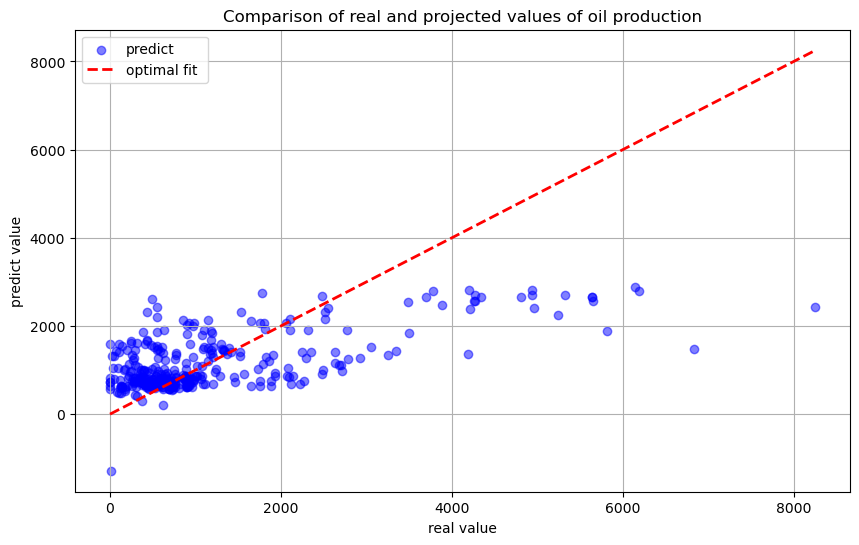

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='predict')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='optimal fit ')
plt.xlabel('real value')
plt.ylabel('predict value')
plt.title('Comparison of real and projected values of oil production')
plt.legend()
plt.grid(True)
plt.show()

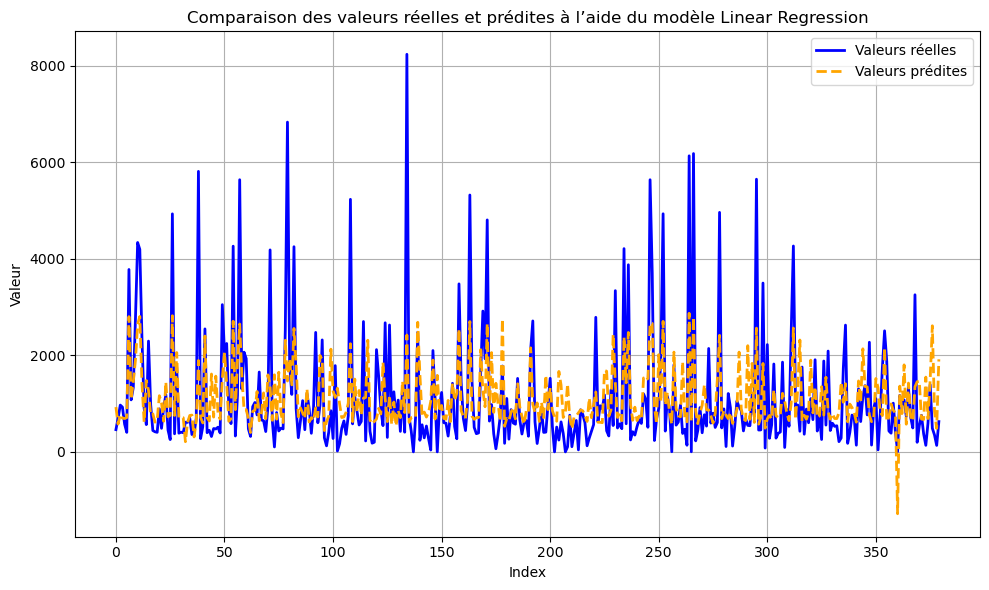

In [107]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

plt.figure(figsize=(10, 6))

plt.plot(y_test, label='Valeurs réelles', color='blue', linewidth=2)
plt.plot(y_pred, label='Valeurs prédites', color='orange', linestyle='--', linewidth=2)

plt.xlabel('Index')
plt.ylabel('Valeur')
plt.title('Comparaison des valeurs réelles et prédites à l’aide du modèle Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Second Model: RandomForestRegressor


In [145]:
X = df[important_features]
y = df['QO_STB_D_2']


In [146]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

In [148]:
param_dist = {
    'max_depth': [30, 50,70,90,120],
    'min_samples_leaf': [2, 4, 6,8,10],
    'min_samples_split':[4, 6, 8,10,12],
    'n_estimators': [500, 700, 1000,1500,2000]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50, 
    cv=5,
    verbose=1,
    n_jobs=-1  
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [30, 50, 70, 90, 120],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [4, 6, 8, 10, 12],
                                        'n_estimators': [500, 700, 1000, 1500,
                                                         2000]},
                   verbose=1)

In [153]:
random_search.best_estimator_

RandomForestRegressor(max_depth=120, min_samples_leaf=2, min_samples_split=6,
                      n_estimators=700, random_state=42)

In [150]:
y_pred=random_search.predict(X_test)

In [151]:
r2_score(y_test, y_pred)

0.8825486706388517

In [152]:
mean_absolute_error(y_test, y_pred)

206.5276844660315

In [112]:
model2=RandomForestRegressor(max_depth=70, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=2000, random_state=42)

In [113]:
y_pred=model2.fit(X_train,y_train).predict(X_test)

In [114]:
r2_score(y_test, y_pred)

0.8834402729833728

In [115]:
mean_absolute_error(y_test, y_pred)

203.85860423196397

In [116]:
mse=mean_squared_error(y_test,y_pred )
print(mse)
mean_y_test=np.mean(y_test)
print(mean_y_test)

182853.9155194124
1111.9050383861622


In [117]:
RMSE=np.sqrt(mse)
print(RMSE)

427.61421342070986


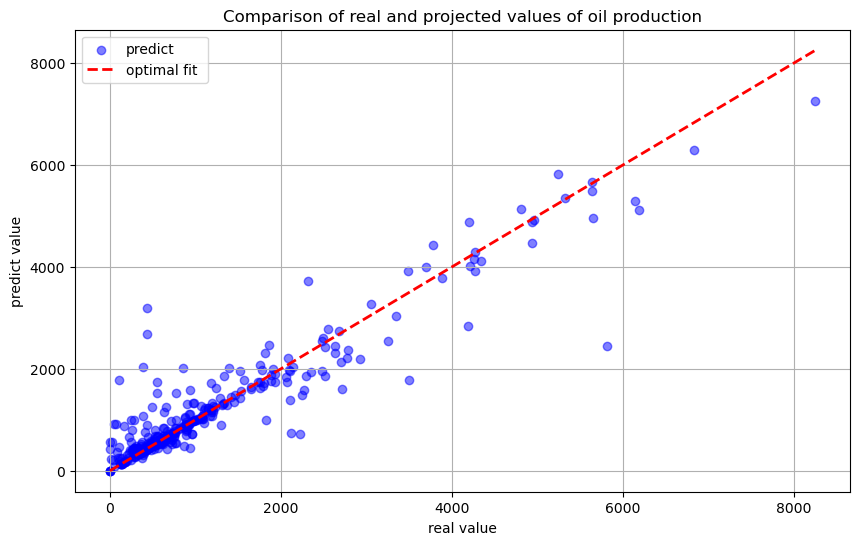

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='predict')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='optimal fit ')
plt.xlabel('real value')
plt.ylabel('predict value')
plt.title('Comparison of real and projected values of oil production')
plt.legend()
plt.grid(True)
plt.show()

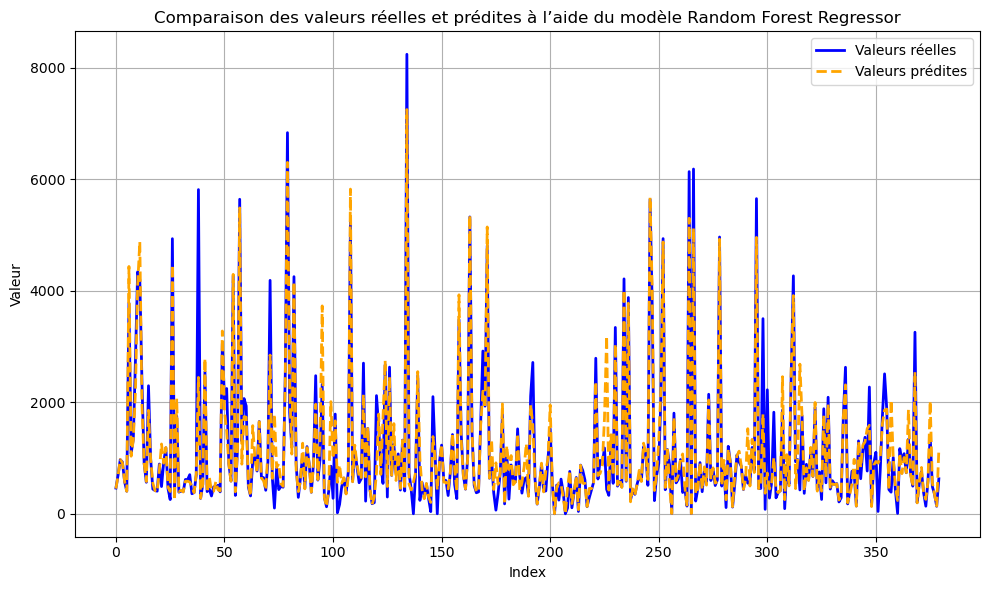

In [119]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

plt.figure(figsize=(10, 6))

plt.plot(y_test, label='Valeurs réelles', color='blue', linewidth=2)
plt.plot(y_pred, label='Valeurs prédites', color='orange', linestyle='--', linewidth=2)

plt.xlabel('Index')
plt.ylabel('Valeur')
plt.title('Comparaison des valeurs réelles et prédites à l’aide du modèle Random Forest Regressor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [155]:

results = []

for i in range(5):
   
    y_pred_single = random_search.predict(X_test.iloc[[i]])[0]  
    y_real_single = y_test.iloc[i]
    alfarek_single = y_real_single - y_pred_single
   
    results.append({
        'y_pred_Random': y_pred_single,
        'y_real': y_real_single,
        'Difference': alfarek_single
    })
 

df_results = pd.DataFrame(results,index=[X_test.index[i] for i in range(5)])

print(df_results)


      y_pred_Random      y_real  Difference
298      455.711040  460.767429    5.056389
3079     689.632069  696.000000    6.367931
1361     973.023646  969.793684   -3.229962
2712     909.217513  927.600000   18.382487
2417     582.678927  574.800000   -7.878927


## Third Model: CatBoostRegressor


In [107]:
X = df[important_features]
y = df['QO_STB_D_2']


In [108]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

In [109]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Hyperparameters grid
param_dist = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': [1, 3, 5, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bylevel': [0.7, 0.8, 1.0],
}

model = CatBoostRegressor(random_state=42, verbose=0)
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=1)
random_search.fit(X_train_scaled, y_train_scaled)


y_pred_scaled = random_search.best_estimator_.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_orig = y_test.values.reshape(-1, 1)

r2 = r2_score(y_test_orig, y_pred)
mae = mean_absolute_error(y_test_orig, y_pred)

print(f"R² Score: {r2*100:.2f}%")
print(f"MAE (برميل/يوم): {mae:.2f}")



Fitting 5 folds for each of 50 candidates, totalling 250 fits
R² Score: 93.03%
MAE (برميل/يوم): 175.87


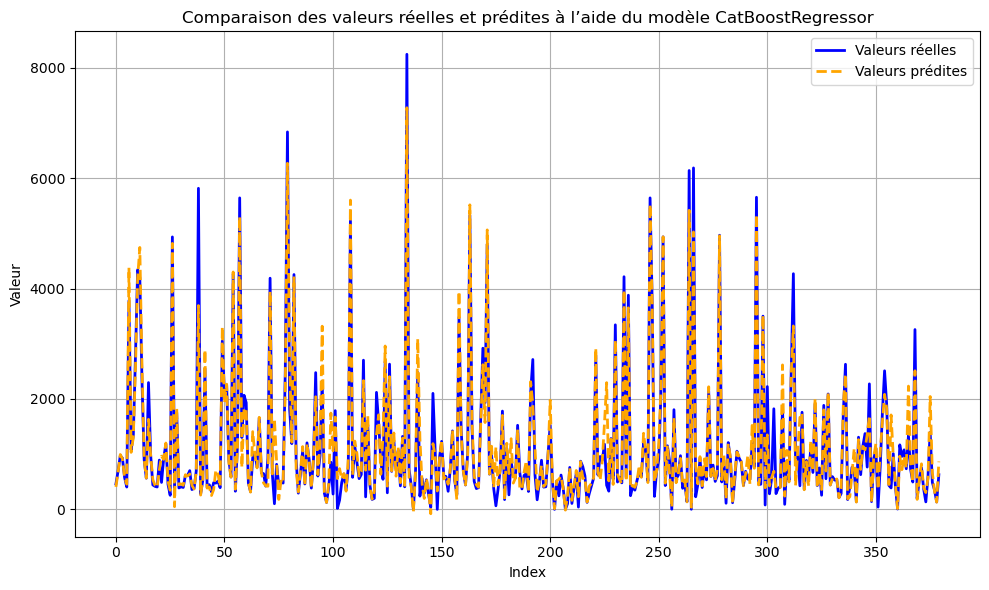

In [111]:
y_test = np.array(y_test_orig)
y_pred = np.array(y_pred)

plt.figure(figsize=(10, 6))

plt.plot(y_test, label='Valeurs réelles', color='blue', linewidth=2)
plt.plot(y_pred, label='Valeurs prédites', color='orange', linestyle='--', linewidth=2)

plt.xlabel('Index')
plt.ylabel('Valeur')
plt.title('Comparaison des valeurs réelles et prédites à l’aide du modèle CatBoostRegressor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [110]:
random_search.best_params_

{'subsample': 1.0,
 'learning_rate': 0.05,
 'l2_leaf_reg': 1,
 'iterations': 1000,
 'depth': 9,
 'colsample_bylevel': 1.0}

## Third Model: CatBoostRegressor


In [135]:
third_model = CatBoostRegressor(subsample= 1.0,learning_rate= 0.05,l2_leaf_reg= 1,iterations= 1000,depth= 9,colsample_bylevel= 1.0)

In [136]:
y_pred=third_model.fit(X_train, y_train).predict(X_test)

0:	learn: 1120.7203560	total: 14.6ms	remaining: 14.5s
1:	learn: 1081.8985037	total: 30.8ms	remaining: 15.4s
2:	learn: 1051.4052079	total: 48.7ms	remaining: 16.2s
3:	learn: 1016.5571135	total: 66ms	remaining: 16.4s
4:	learn: 985.0694658	total: 82.8ms	remaining: 16.5s
5:	learn: 954.6261714	total: 95.5ms	remaining: 15.8s
6:	learn: 929.5509878	total: 108ms	remaining: 15.4s
7:	learn: 902.5702398	total: 121ms	remaining: 15s
8:	learn: 875.5818947	total: 134ms	remaining: 14.7s
9:	learn: 851.7397660	total: 146ms	remaining: 14.5s
10:	learn: 827.7105787	total: 161ms	remaining: 14.5s
11:	learn: 804.4248716	total: 176ms	remaining: 14.5s
12:	learn: 783.9543629	total: 191ms	remaining: 14.5s
13:	learn: 766.8205801	total: 206ms	remaining: 14.5s
14:	learn: 748.7172282	total: 224ms	remaining: 14.7s
15:	learn: 730.6410676	total: 246ms	remaining: 15.1s
16:	learn: 713.4197363	total: 269ms	remaining: 15.6s
17:	learn: 696.9879510	total: 285ms	remaining: 15.5s
18:	learn: 682.3949963	total: 297ms	remaining: 15.

In [137]:
r2 = r2_score(y_test,y_pred )
r2

0.9315360645848124

In [138]:
mae = mean_absolute_error(y_test,y_pred )
mae 

180.77772892207045

In [139]:
mse=mean_squared_error(y_test,y_pred )
print(mse)
mean_y_test=np.mean(y_test)
print(mean_y_test)


107403.29428490675
1111.9050383861622


In [140]:
RMSE=np.sqrt(mse)
print(RMSE)

327.7244182005771


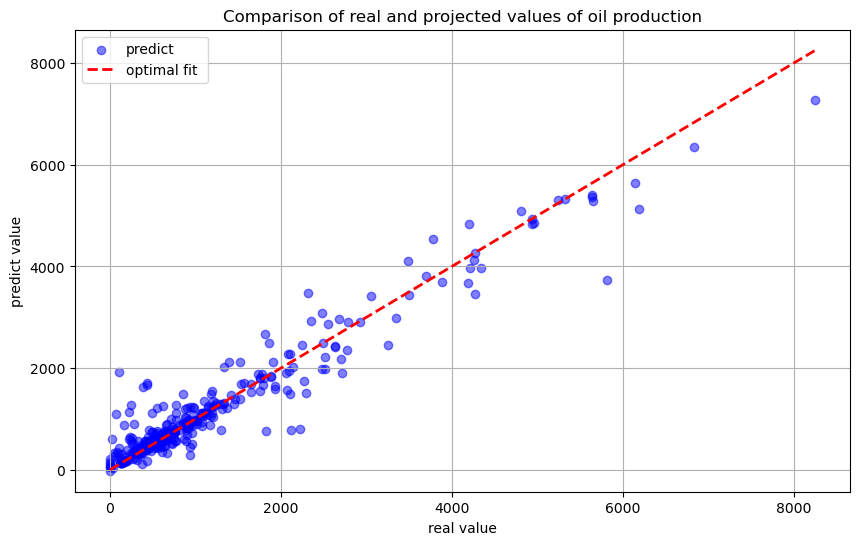

In [133]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_orig, y_pred, alpha=0.5, color='blue', label='predict')
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--', lw=2, label='optimal fit ')
plt.xlabel('real value')
plt.ylabel('predict value')
plt.title('Comparison of real and projected values of oil production')
plt.legend()
plt.grid(True)
plt.show()

In [143]:

results = []

for i in range(8):
    # توقع للعنصر i
    y_pred_single = third_model.predict(X_test.iloc[[i]])[0]  # بدون reshape, وخذ العنصر مباشرة
    y_real_single = y_test[i]
    alfarek_single = y_real_single - y_pred_single
    
   
    results.append({
        'y_pred_Random': y_pred_single,
        'y_real': y_real_single,
        'Difference': alfarek_single
    })


df_results = pd.DataFrame(results,index=[X_test.index[i] for i in range(8)])

print(df_results)


      y_pred_Random                y_real            Difference
298      391.956652  [460.76742944776515]   [68.81077759400216]
3079     689.759180               [696.0]   [6.240819744598184]
1361     978.170192   [969.7936838368175]  [-8.376507878413236]
2712     861.517042   [927.5999999999999]    [66.0829575945603]
2417     553.178206               [574.8]  [21.621793545499486]
3358     461.958061               [404.4]  [-57.55806052277035]
402     4568.026520   [3780.876493336738]   [-787.150026350379]
321      935.763658  [1077.9199541027597]  [142.15629616273839]


In [141]:
import joblib

In [142]:
joblib.dump(third_model, 'model.pkl')

['model.pkl']